### Mansi Saxena
#### TASK:5  **Exploratory Data Analysis - Sports(Level- Advanced)**
#### *Using IPL dataset to find out valueable insights about matches from 2008-2019*

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [2]:
ipl_match = pd.read_csv("matches.csv")

In [3]:
ipl_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Data Manipulation & Cleaning

In [4]:
ipl_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
list(ipl_match.city.unique())

['Hyderabad',
 'Pune',
 'Rajkot',
 'Indore',
 'Bangalore',
 'Mumbai',
 'Kolkata',
 'Delhi',
 'Chandigarh',
 'Kanpur',
 'Jaipur',
 'Chennai',
 'Cape Town',
 'Port Elizabeth',
 'Durban',
 'Centurion',
 'East London',
 'Johannesburg',
 'Kimberley',
 'Bloemfontein',
 'Ahmedabad',
 'Cuttack',
 'Nagpur',
 'Dharamsala',
 'Kochi',
 'Visakhapatnam',
 'Raipur',
 'Ranchi',
 'Abu Dhabi',
 'Sharjah',
 nan,
 'Mohali',
 'Bengaluru']

#### Bangalore is now known as Bengaluru , so correcting it

In [6]:
ipl_match.replace(to_replace='Bangalore',value='Bengaluru')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [7]:
ipl_match[ipl_match['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


#### replacing 7 null values in 'city' with Dubai

In [8]:
ipl_match['city'].fillna('Dubai',inplace=True)

#### dropping null values in umpire1, umpire2,winner

In [9]:
ipl_match.dropna(subset=["umpire1","umpire2"], inplace=True)

In [10]:
ipl_match.dropna(subset=["winner"], inplace=True)

In [11]:
list(ipl_match['winner'].unique())

['Sunrisers Hyderabad',
 'Rising Pune Supergiant',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Pune Warriors',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants',
 'Delhi Capitals']

In [12]:
ipl_match.replace(to_replace=['Rising Pune Supergiant','Delhi Daredevils','Deccan Chargers','Pune Warriors'],value=['Rising Pune Supergiants','Delhi Capitals','Sunrisers Hyderabad','Rising Pune Supergiants'],inplace=True)
list(ipl_match['winner'].unique())

['Sunrisers Hyderabad',
 'Rising Pune Supergiants',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Delhi Capitals',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Kochi Tuskers Kerala']

### Which season has highest number of matches ?

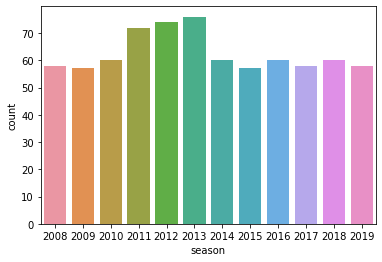

In [13]:
sns.countplot(x='season', data=ipl_match)

### Most successful team in IPL

In [14]:
ipl_match['winner'].value_counts(sort=True)

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     83
Kings XI Punjab                 82
Delhi Capitals                  76
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

#### *MI has the highest number of wins followed by CSK*

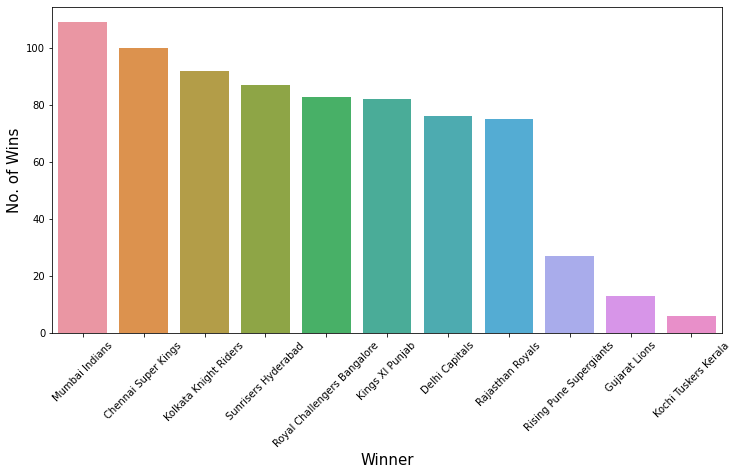

In [15]:
plt.figure(figsize=(12,6))
chart=sns.countplot(x="winner",data=ipl_match,order=ipl_match['winner'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_xlabel("Winner",fontsize=15)
chart.set_ylabel("No. of Wins",fontsize=15)
plt.show()

### Does batting second team has high chance of winning ?

In [16]:
batting_first = ipl_match[ipl_match['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiants,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN


In [17]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    34
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants        13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [18]:
batting_second = ipl_match[ipl_match['win_by_runs']==0]
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 52
Royal Challengers Bangalore    49
Chennai Super Kings            48
Rajasthan Royals               48
Delhi Capitals                 48
Kings XI Punjab                44
Sunrisers Hyderabad            39
Rising Pune Supergiants        14
Gujarat Lions                  12
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

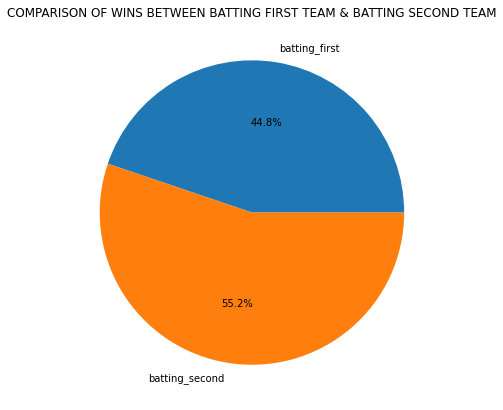

In [19]:
data=[len(batting_first),len(batting_second)]
plt.figure(figsize=(7,7))
plt.pie(data,labels=["batting_first","batting_second"],autopct='%1.1f%%')
plt.title("COMPARISON OF WINS BETWEEN BATTING FIRST TEAM & BATTING SECOND TEAM",fontsize=12)
plt.show()

### Which stadium has conducted most number of matches?

In [20]:
city=ipl_match['venue'].value_counts(sort=True)
df_city=pd.DataFrame(columns=['venue','matches'])
for index,value in city.iteritems():
    temp=pd.DataFrame({'venue':[index],
                      'matches':[value]})
    df_city=df_city.append(temp,ignore_index=True)
    

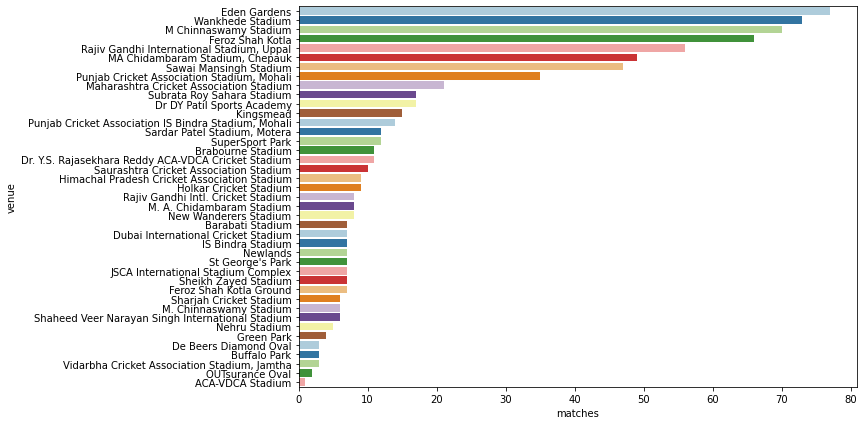

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x='matches',y='venue',data=df_city,palette='Paired')

### Top 10 players in IPL

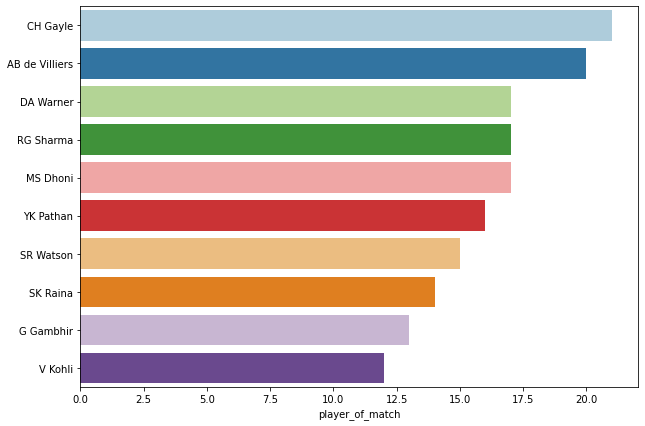

In [22]:
player=ipl_match['player_of_match'].value_counts()[:10]

plt.figure(figsize=(10,7))
sns.barplot(x=player,y=player.index,palette='Paired')